In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#inicijaliziraj podatke

tickers = [
    "ZS", "VRSN", "VRNS", "TENB", "SPLK", "S", "RPD", "QLYS", "PANW", "OKTA", "NET", "LDOS", "GEN", "FTNT", "FFIV",
    "DOCU", "CYBR", "CVLT", "CSCO", "CRWD", "CHKP", "BAH", "AKAM",
]
market_cap = [25.76, 21.16, 3.87, 4.36, 24.77, 4.64, 3.10, 6.32, 78.79, 10.67, 21.18, 14.24, 12.35, 39.03, 9.42, 8.33,
              7.68, 3.08, 213.02, 46.88, 16.62, 16.43, 16.71]

In [10]:
ticker_market_cap = {}
for key,value in enumerate(tickers):
    ticker_market_cap[value] = market_cap[key]

ticker_market_cap = dict(sorted(ticker_market_cap.items(), key=lambda x:x[1], reverse=True))
tickers = list(ticker_market_cap.keys())
tickers

['CSCO',
 'PANW',
 'CRWD',
 'FTNT',
 'ZS',
 'SPLK',
 'NET',
 'VRSN',
 'AKAM',
 'CHKP',
 'BAH',
 'LDOS',
 'GEN',
 'OKTA',
 'FFIV',
 'DOCU',
 'CYBR',
 'QLYS',
 'S',
 'TENB',
 'VRNS',
 'RPD',
 'CVLT']

In [12]:
ohlc = yf.download(tickers, period="1y")
#ohlc = pd.read_csv("stock_prices.csv")

[*********************100%%**********************]  23 of 23 completed


In [13]:
prices = ohlc["Adj Close"]

In [14]:
from pypfopt import risk_models, expected_returns
from pypfopt import plotting

mu = expected_returns.capm_return(prices)
S = risk_models.semicovariance(prices)

<Axes: >

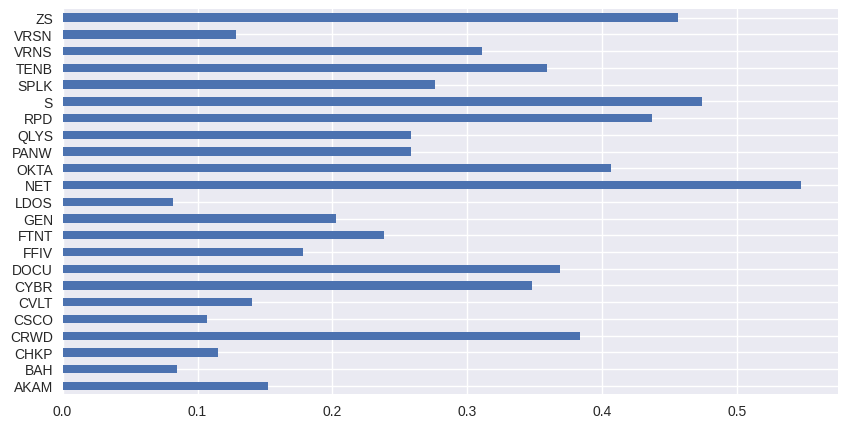

In [15]:
mu.plot.barh(figsize=(10, 5))

<Axes: >

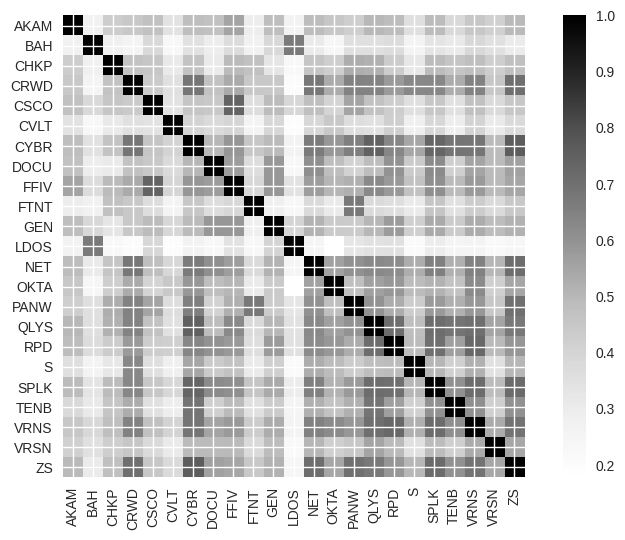

In [16]:
plotting.plot_covariance(S, plot_correlation=True)

In [17]:
"""
Tezine izracunate rucno formulama: TODO dodaj formule
"""

#initial_weights = {"AKAM": 0.0345, "BAH": 0.0330, "CHKP": 0.0316, "CRWD": 0.0597, "CSCO": 0.0839, "CVLT": 0.0233,
#                   "CYBR": 0.0379, "DOCU": 0.0428, "FFIV": 0.0281, "FTNT": 0.0544, "GEN": 0.0351, "LDOS": 0.0334,
#                   "NET": 0.0605, "OKTA": 0.0480, "PANW": 0.0660, "QLYS": 0.0302, "RPD": 0.0425, "S": 0.0480,
#                   "SPLK": 0.0496, "TENB": 0.0362, "VRNS": 0.0315, "VRSN": 0.0338, "ZS": 0.0561}

'\nTezine izracunate rucno formulama: TODO dodaj formule\n'

In [18]:
initial_weights = [0.0839, 0.0500, 0.0509, 0.0543, 0.0473, 0.0492, 0.0489, 0.0452, 0.0417, 0.0387, 0.0330, 0.0335,
                       0.0351, 0.0479, 0.0281, 0.0428, 0.0381, 0.0301, 0.0480, 0.0362, 0.0315, 0.0425, 0.0233]
tmp = {}
for key, value in enumerate(tickers):
    tmp[value] = initial_weights[key]

tmp = dict(sorted(tmp.items(), key=lambda x: x[0]))
tmp

{'AKAM': 0.0417,
 'BAH': 0.033,
 'CHKP': 0.0387,
 'CRWD': 0.0509,
 'CSCO': 0.0839,
 'CVLT': 0.0233,
 'CYBR': 0.0381,
 'DOCU': 0.0428,
 'FFIV': 0.0281,
 'FTNT': 0.0543,
 'GEN': 0.0351,
 'LDOS': 0.0335,
 'NET': 0.0489,
 'OKTA': 0.0479,
 'PANW': 0.05,
 'QLYS': 0.0301,
 'RPD': 0.0425,
 'S': 0.048,
 'SPLK': 0.0492,
 'TENB': 0.0362,
 'VRNS': 0.0315,
 'VRSN': 0.0452,
 'ZS': 0.0473}

In [19]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(mu, S)
ef.set_weights(tmp)

#ef.add_objective(objective_functions.L2_reg, gamma=1)    ##regularizacija
#ef.min_volatility()   #optimizacijski proces smanjivanja volatilnosti portfelja

weights = ef.clean_weights()

In [20]:
weights

OrderedDict([('AKAM', 0.0417),
             ('BAH', 0.033),
             ('CHKP', 0.0387),
             ('CRWD', 0.0509),
             ('CSCO', 0.0839),
             ('CVLT', 0.0233),
             ('CYBR', 0.0381),
             ('DOCU', 0.0428),
             ('FFIV', 0.0281),
             ('FTNT', 0.0543),
             ('GEN', 0.0351),
             ('LDOS', 0.0335),
             ('NET', 0.0489),
             ('OKTA', 0.0479),
             ('PANW', 0.05),
             ('QLYS', 0.0301),
             ('RPD', 0.0425),
             ('S', 0.048),
             ('SPLK', 0.0492),
             ('TENB', 0.0362),
             ('VRNS', 0.0315),
             ('VRSN', 0.0452),
             ('ZS', 0.0473)])

In [21]:
ef.portfolio_performance(verbose=True)

Expected annual return: 27.4%
Annual volatility: 18.8%
Sharpe Ratio: 1.35


(0.2741419722947357, 0.18843916736309407, 1.3486685164822563)

<Axes: >

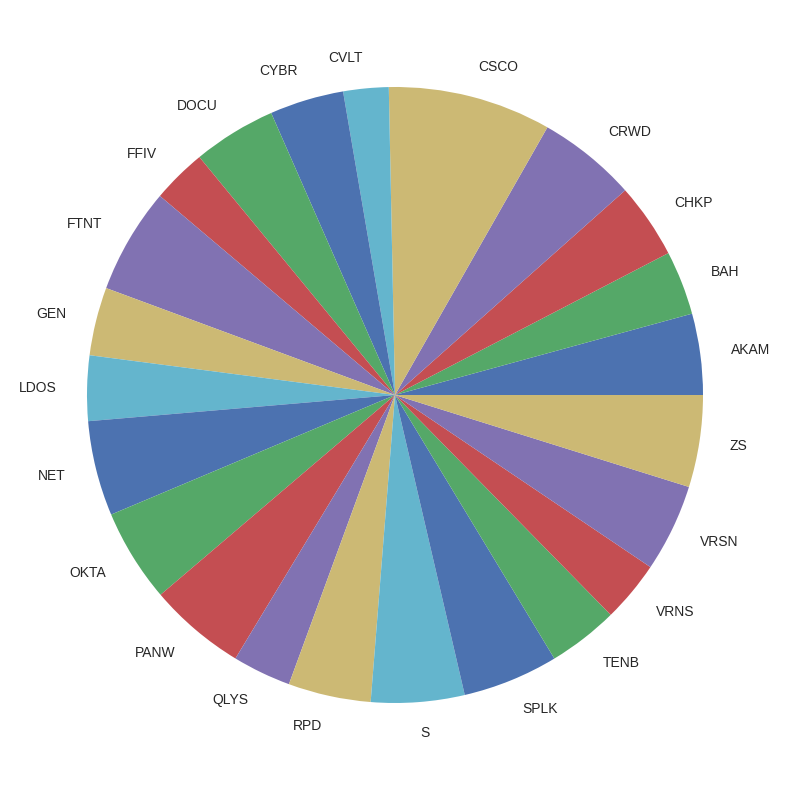

In [22]:
pd.Series(weights).plot.pie(figsize=(10, 10))